In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np


In [2]:
# Reading the data 
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
#cleaning the data and checking for missing values 
df.fillna(df.mean(numeric_only=True), inplace=True)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#Data Visualzation 
# importing the necessary libraries 
import matplotlib.pyplot as plt
import seaborn as sns 

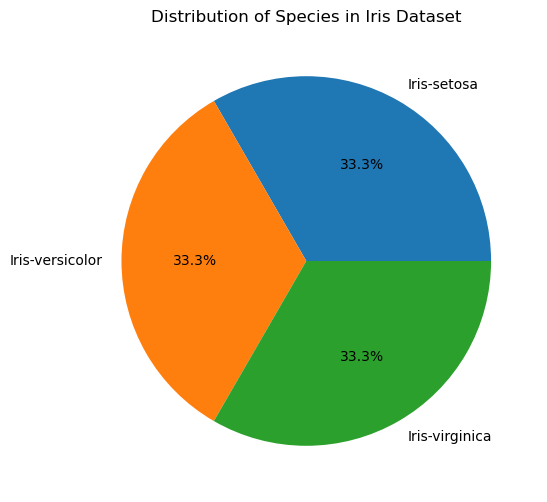

In [6]:
# 1 Visualzation : Pie Chart
plt.figure(figsize=(8, 6))
iris_species_counts = df['Species'].value_counts()
plt.pie(iris_species_counts, labels=iris_species_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Species in Iris Dataset')
plt.show()

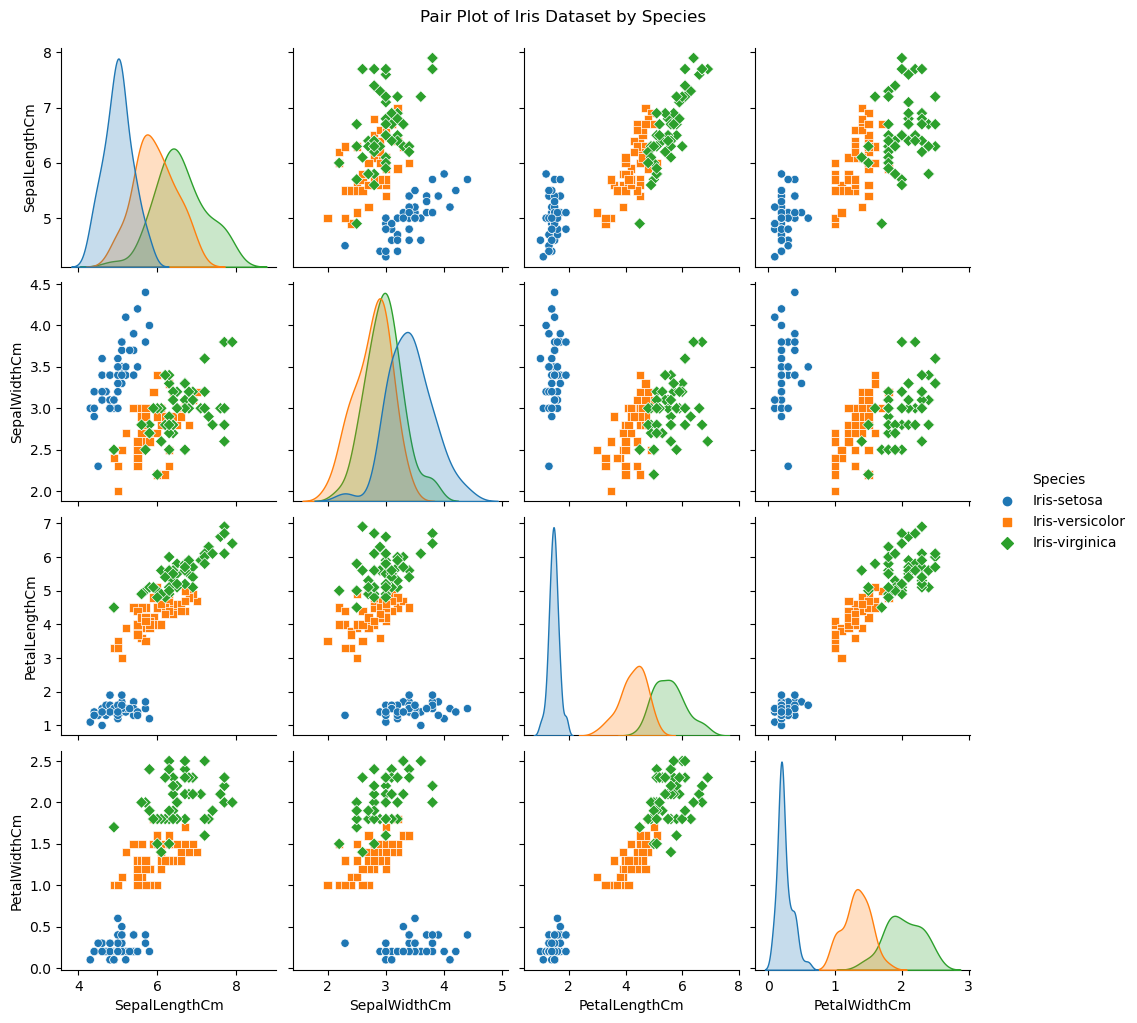

In [6]:
#2 Visualzation :  Pair Plot
# Create a copy of the DataFrame without the 'Id' column for visualization
df_for_plot = df.drop('Id', axis=1).copy()

# Create a pair plot
sns.pairplot(df_for_plot, hue='Species', markers=['o', 's', 'D'])
plt.suptitle('Pair Plot of Iris Dataset by Species', y=1.02)
plt.show()


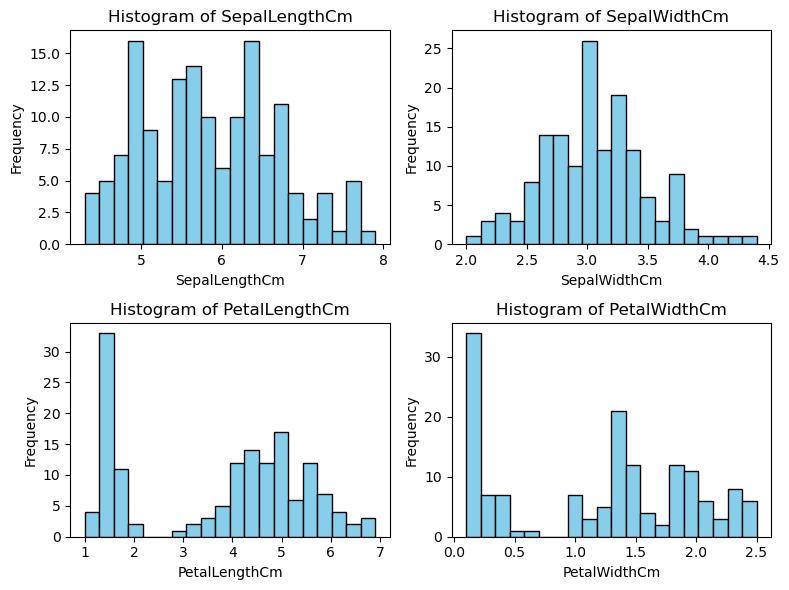

In [7]:
# 3 Visualzation :  Histogram 
# Extract numerical features for histogram
numerical_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Plot histograms for each numerical feature
plt.figure(figsize=(8,6))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(2, 2, i)
    plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

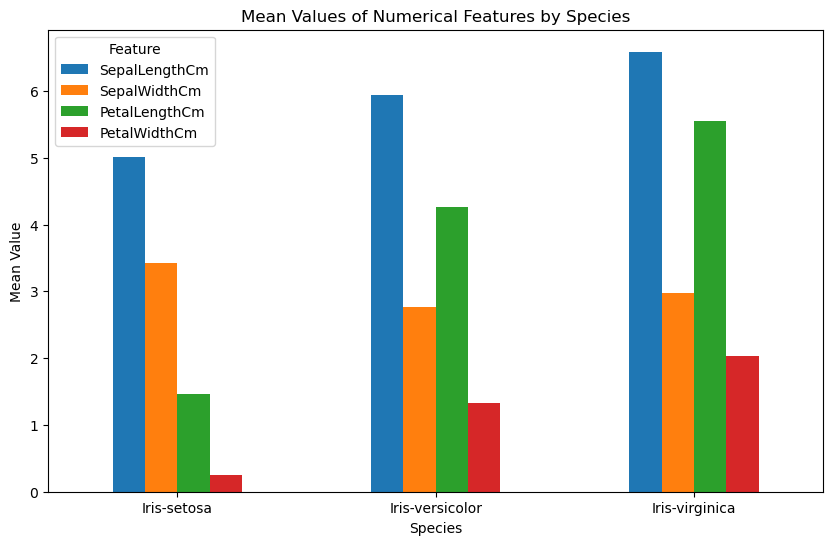

In [8]:
# # 3 Visualzation :  Histogram 
# Drop the 'Id' column if it exists
df.drop('Id', axis=1, inplace=True, errors='ignore')

# Calculate mean values for each numerical feature by Species
mean_values_by_species = df.groupby('Species').mean()

# Plot the mean values using a bar chart
mean_values_by_species.plot(kind='bar', figsize=(10, 6))

plt.title('Mean Values of Numerical Features by Species')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Feature')
plt.show()

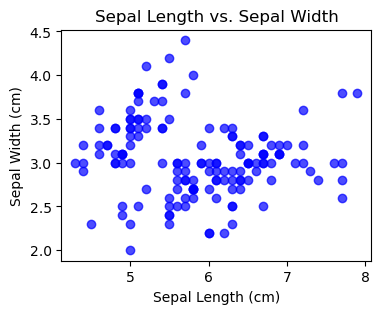

In [9]:
# 5 Visualzation : Scatter Plot 
# Create a scatter plot for Sepal Length vs. Sepal Width
plt.figure(figsize=(4,3))
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c='blue', alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs. Sepal Width')
plt.show()


# K Means Clustering 

In [11]:
# Assuming you have already imported the necessary libraries

# Mapping species to numerical values
species_to_num = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['Species_numeric'] = df['Species'].map(species_to_num)

# Exclude non-numeric and unnecessary columns
X = df.drop(['Species', 'Species_numeric'], axis=1)

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Choose the number of clusters (K)
n_clusters = 3  # You can change this to any desired number of clusters

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(X_standardized)

# Get user input for all four features and standardize the input
sepal_length = float(input('Enter the Sepal Length: '))
sepal_width = float(input('Enter the Sepal Width: '))
petal_length = float(input('Enter the Petal Length: '))
petal_width = float(input('Enter the Petal Width: '))

# Standardize the user input
user_input_standardized = scaler.transform([[sepal_length, sepal_width, petal_length, petal_width]])

# Predict the cluster for the standardized user input
predicted_cluster = kmeans.predict(user_input_standardized)

# Map the cluster to a flower name (assuming cluster 0 corresponds to 'Iris-setosa', cluster 1 to 'Iris-versicolor', and cluster 2 to 'Iris-virginica')
cluster_to_flower = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
predicted_flower = cluster_to_flower[predicted_cluster[0]]

print(f'For Sepal Length {sepal_length}, Sepal Width {sepal_width}, Petal Length {petal_length}, and Petal Width {petal_width}, the predicted flower is: {predicted_flower}')


C:\Users\91630\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Enter the Sepal Length: 2.1
Enter the Sepal Width: 1.5
Enter the Petal Length: 1.6
Enter the Petal Width: 1.5
For Sepal Length 2.1, Sepal Width 1.5, Petal Length 1.6, and Petal Width 1.5, the predicted flower is: Iris-virginica


C:\Users\91630\New folder\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Visual for K-Means : Pair Plot

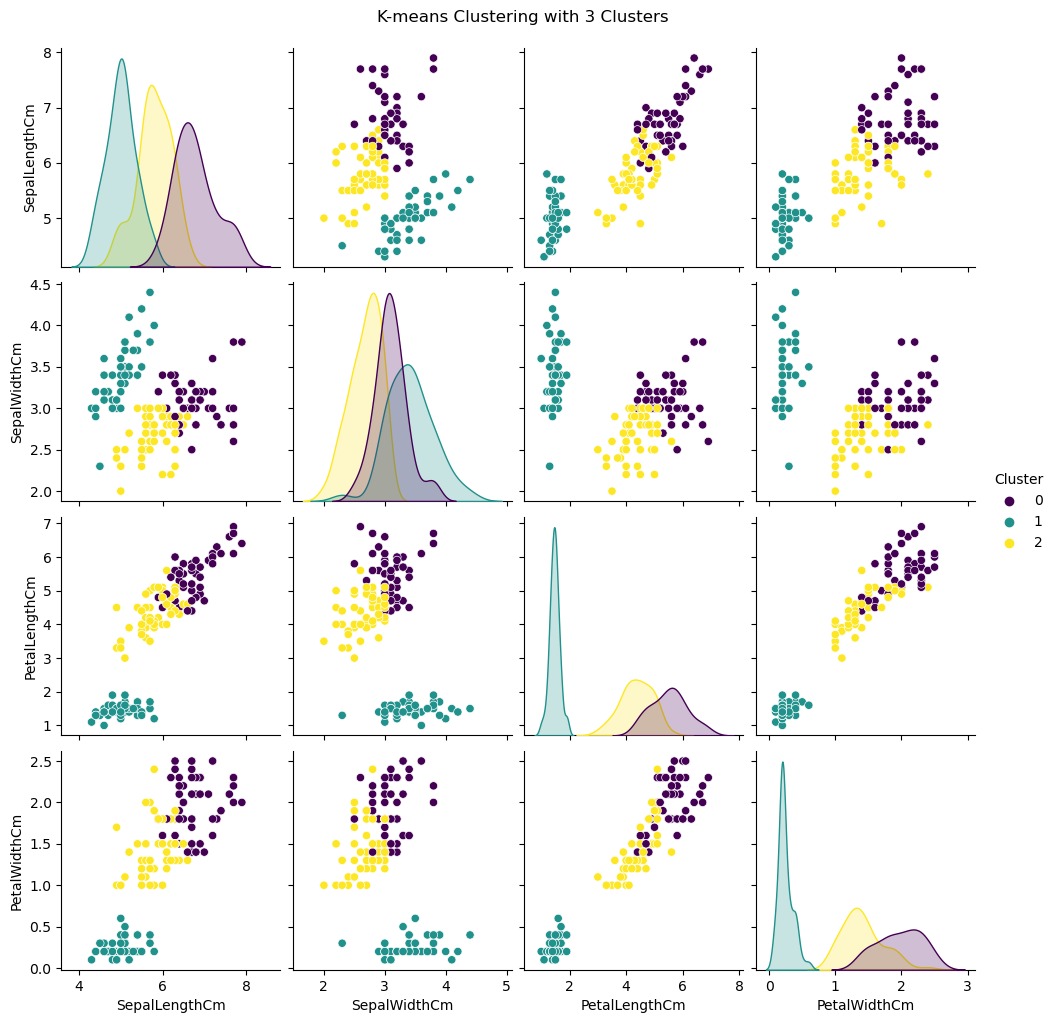

In [12]:
# Add the cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Visualize the clusters using a pair plot for the first 4 features
sns.pairplot(df, hue='Cluster', palette='viridis', vars=X.columns)
plt.suptitle(f'K-means Clustering with {n_clusters} Clusters', y=1.02)
plt.show()
